In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import cv2

In [2]:
DATA_PATH = "../data/archive/BraTS2020_training_data/content/data/"
DATA_PATH2 = "../data/archive/BraTS2020_training_data"
metadata = pd.read_csv("{}{}".format(DATA_PATH, "meta_data.csv"))

In [3]:
total_volumes = len(metadata["volume"].unique())
total_slices = len(metadata["slice_path"].unique())
negative_volumes = np.sum(metadata.groupby("volume").max()["target"] == 0)
positive_volumes = np.sum(metadata.groupby("volume").max()["target"])
negative_slices = np.sum(metadata["target"] == 0)
positive_slices = np.sum(metadata["target"] == 1)
positive_volumes = np.sum(metadata.groupby("volume").max()["target"])

print("Total number of volumes: {}".format(total_volumes))
print("Total number of slices: {}".format(total_slices))
print("Volumes with no positive slices: {} ({})".format(negative_volumes, negative_volumes/ total_volumes))
print("Volumes with at least one positive slice: {} ({})".format(positive_volumes, positive_volumes/ total_volumes))
print("Negative slices: {} ({})".format(negative_slices, negative_slices / total_slices))
print("Positive slices: {} ({})".format(positive_slices, positive_slices / total_slices))

Total number of volumes: 369
Total number of slices: 57195
Volumes with no positive slices: 0 (0.0)
Volumes with at least one positive slice: 369 (1.0)
Negative slices: 32773 (0.5730046332721391)
Positive slices: 24422 (0.4269953667278608)


(0.0, 155.0)

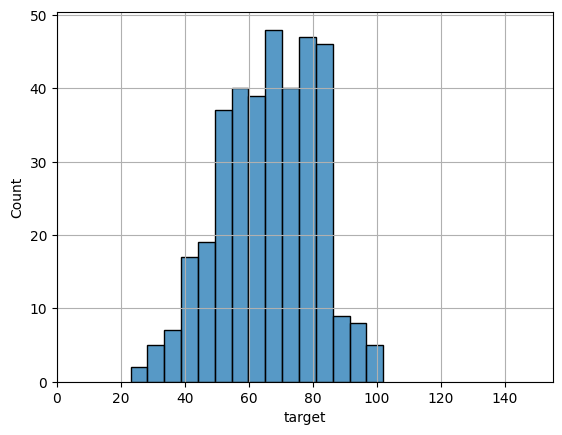

In [4]:
sns.histplot(
    data=metadata.groupby("volume").sum().reset_index(), x="target",
    bins=15
    )
plt.grid()
plt.xlim([0, total_slices // total_volumes])

In [5]:
def getPixelValsLabels(slice_num, layer):
    vals = []
    labels = []
    for path in metadata.loc[(metadata["slice"] == slice_num)]["slice_path"]:
        f = f=h5py.File("{}/{}".format(DATA_PATH2, path),'r')
        img=f['image']
        imgArray=np.array(img)
        vals += list(cv2.normalize(imgArray[:][:][layer], None).reshape(-1))
        labels += len(imgArray[:][:][layer].reshape(-1)) * [metadata.loc[metadata["slice_path"] == path]["target"].iloc[0]]
    violin_df = pd.DataFrame()
    violin_df["vals"] = vals
    violin_df["labels"] = labels
    return violin_df

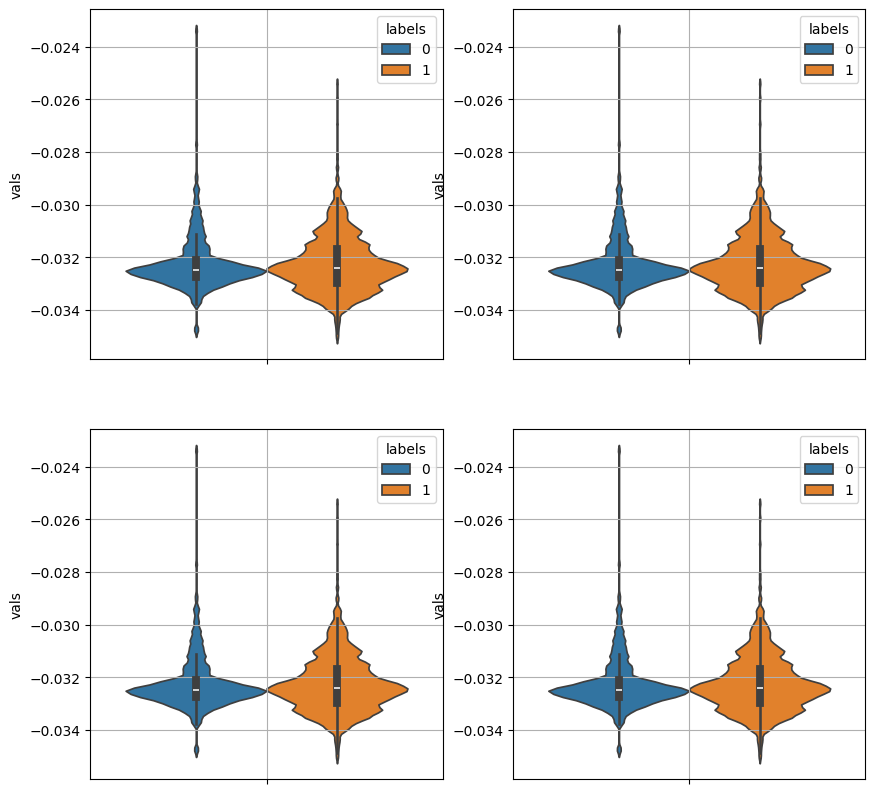

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for el in [(0, 0, 0), (0, 1, 1), (1, 0, 2), (1, 1, 3)]:
    df = getPixelValsLabels(100, el[2])
    sns.violinplot(data=df, y="vals", hue="labels", ax=axes[el[0], el[1]])
    axes[el[0], el[1]].grid()
plt.show()

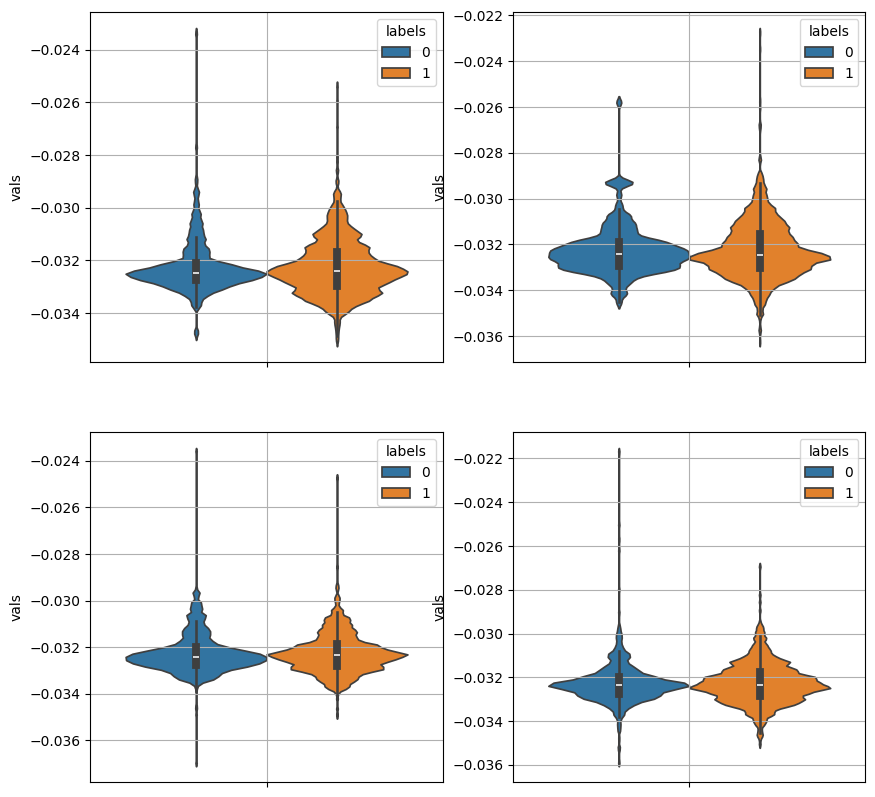

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for el in [(0, 0, 100), (0, 1, 70), (1, 0, 120), (1, 1, 50)]:
    df = getPixelValsLabels(el[2], 0)
    sns.violinplot(data=df, y="vals", hue="labels", ax=axes[el[0], el[1]])
    axes[el[0], el[1]].grid()
plt.show()

In [8]:
for path in os.listdir(DATA_PATH):
    if ".h5" in path:
        f=h5py.File("{}/{}".format(DATA_PATH, path),'r')
        img=f['mask']
        imgArray=np.array(img)
imgArray

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [34]:
np.sum(metadata.groupby("volume").sum()["target"])

24422

In [35]:
metadata.groupby("volume").sum()["target"]

volume
1       83
2       55
3       52
4       68
5       51
      ... 
365     71
366     44
367     82
368     66
369    102
Name: target, Length: 369, dtype: int64

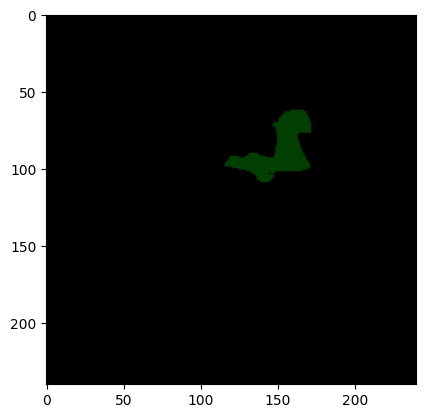

In [81]:
plt.imshow(imgArray/4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


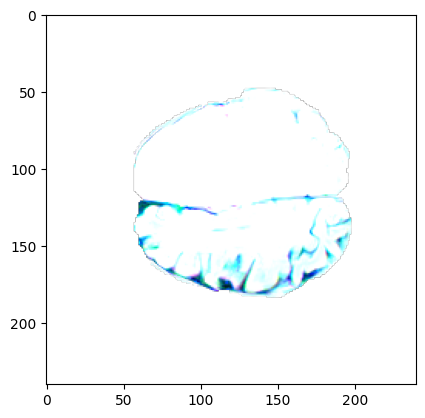

In [131]:
plt.imshow(imgArray)

In [129]:
imgArray

array([[[-0.54866011, -0.59061538, -0.58992809, -0.5591954 ],
        [-0.54866011, -0.59061538, -0.58992809, -0.5591954 ],
        [-0.54866011, -0.59061538, -0.58992809, -0.5591954 ],
        ...,
        [-0.54866011, -0.59061538, -0.58992809, -0.5591954 ],
        [-0.54866011, -0.59061538, -0.58992809, -0.5591954 ],
        [-0.54866011, -0.59061538, -0.58992809, -0.5591954 ]],

       [[-0.54866011, -0.59061538, -0.58992809, -0.5591954 ],
        [-0.54866011, -0.59061538, -0.58992809, -0.5591954 ],
        [-0.54866011, -0.59061538, -0.58992809, -0.5591954 ],
        ...,
        [-0.54866011, -0.59061538, -0.58992809, -0.5591954 ],
        [-0.54866011, -0.59061538, -0.58992809, -0.5591954 ],
        [-0.54866011, -0.59061538, -0.58992809, -0.5591954 ]],

       [[-0.54866011, -0.59061538, -0.58992809, -0.5591954 ],
        [-0.54866011, -0.59061538, -0.58992809, -0.5591954 ],
        [-0.54866011, -0.59061538, -0.58992809, -0.5591954 ],
        ...,
        [-0.54866011, -0.59

In [67]:
57195 * 240 * 240

3294432000

In [126]:
imgArray[:, :, 0]

array([[-0.54866011, -0.54866011, -0.54866011, ..., -0.54866011,
        -0.54866011, -0.54866011],
       [-0.54866011, -0.54866011, -0.54866011, ..., -0.54866011,
        -0.54866011, -0.54866011],
       [-0.54866011, -0.54866011, -0.54866011, ..., -0.54866011,
        -0.54866011, -0.54866011],
       ...,
       [-0.54866011, -0.54866011, -0.54866011, ..., -0.54866011,
        -0.54866011, -0.54866011],
       [-0.54866011, -0.54866011, -0.54866011, ..., -0.54866011,
        -0.54866011, -0.54866011],
       [-0.54866011, -0.54866011, -0.54866011, ..., -0.54866011,
        -0.54866011, -0.54866011]])

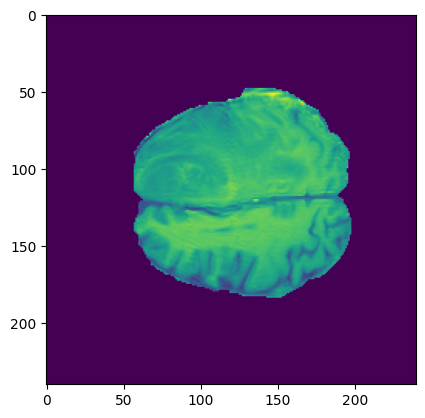

In [135]:
plt.imshow(cv2.normalize(imgArray[:, :, 1], None))

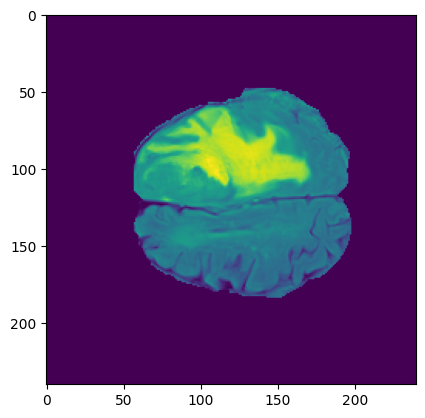

In [137]:
plt.imshow(imgArray[:, :, 0])

In [141]:
cv2.normalize(imgArray[:, :, 1], None)

array([[-0.0024609, -0.0024609, -0.0024609, ..., -0.0024609, -0.0024609,
        -0.0024609],
       [-0.0024609, -0.0024609, -0.0024609, ..., -0.0024609, -0.0024609,
        -0.0024609],
       [-0.0024609, -0.0024609, -0.0024609, ..., -0.0024609, -0.0024609,
        -0.0024609],
       ...,
       [-0.0024609, -0.0024609, -0.0024609, ..., -0.0024609, -0.0024609,
        -0.0024609],
       [-0.0024609, -0.0024609, -0.0024609, ..., -0.0024609, -0.0024609,
        -0.0024609],
       [-0.0024609, -0.0024609, -0.0024609, ..., -0.0024609, -0.0024609,
        -0.0024609]])

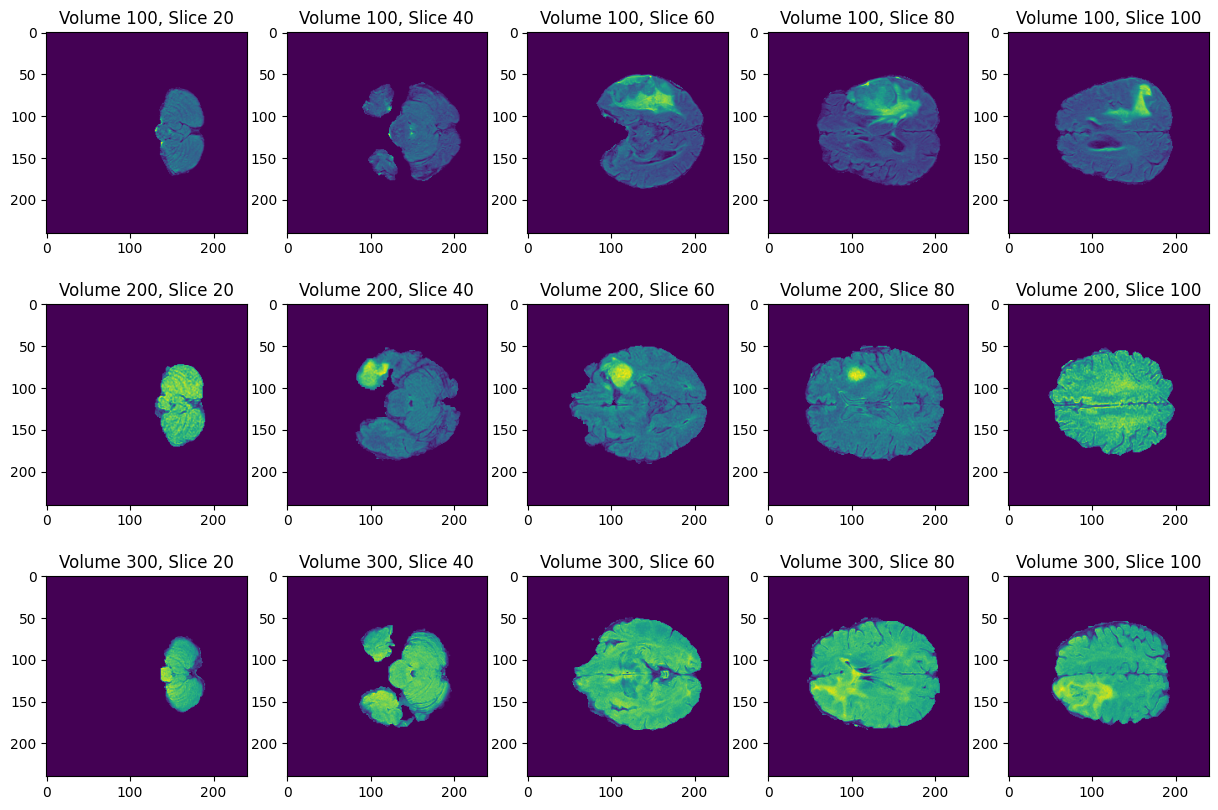

In [154]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))
for i, volume in enumerate([100, 200, 300]):
    for j, slice in enumerate([20, 40, 60, 80, 100]):
        f=h5py.File("{}/volume_{}_slice_{}.h5".format(DATA_PATH, volume, slice),'r')
        img=f['image']
        imgArray=np.array(img)[:, :, 0]
        axes[i, j].imshow(imgArray)
        axes[i, j].set_title("Volume {}, Slice {}".format(volume, slice))

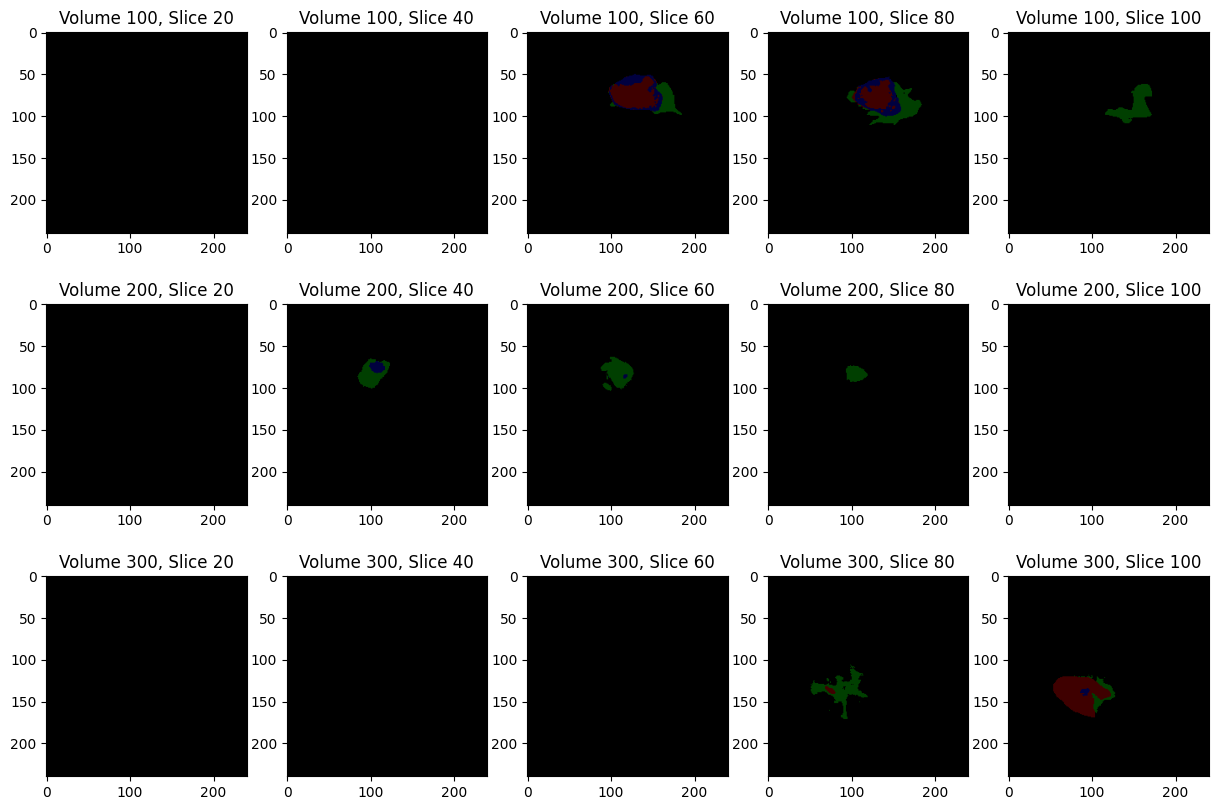

In [158]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))
for i, volume in enumerate([100, 200, 300]):
    for j, slice in enumerate([20, 40, 60, 80, 100]):
        f=h5py.File("{}/volume_{}_slice_{}.h5".format(DATA_PATH, volume, slice),'r')
        img=f['mask']
        imgArray=np.array(img)[:, :] / 4
        axes[i, j].imshow(imgArray)
        axes[i, j].set_title("Volume {}, Slice {}".format(volume, slice))

In [156]:
imgArray

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

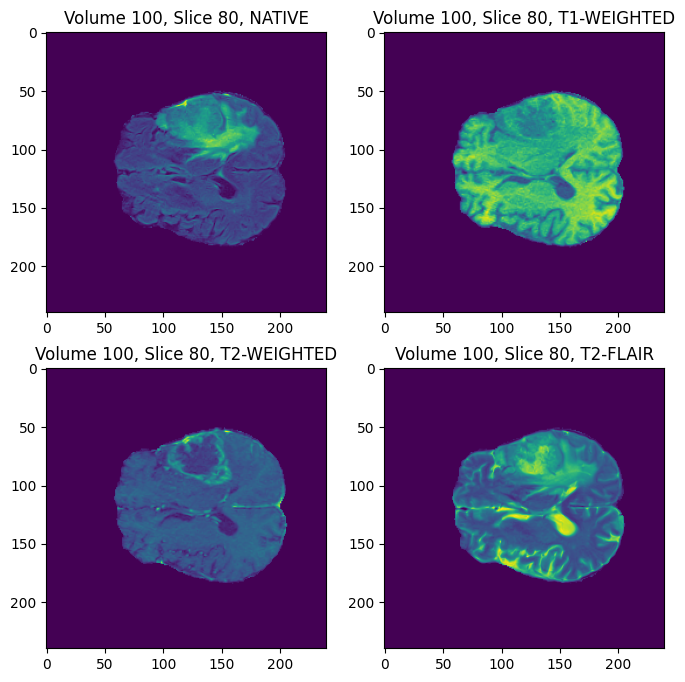

In [170]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
for i, volume in enumerate([100]):
    for j, slice in enumerate([80]):
        f=h5py.File("{}/volume_{}_slice_{}.h5".format(DATA_PATH, volume, slice),'r')
        img=f['image']
        imgArray=np.array(img)
        axes[0, 0].imshow(imgArray[:, :, 0])
        axes[0, 1].imshow(imgArray[:, :, 1])
        axes[1, 0].imshow(imgArray[:, :, 2])
        axes[1, 1].imshow(imgArray[:, :, 3])
        axes[0, 0].set_title("Volume {}, Slice {}, NATIVE".format(volume, slice))
        axes[0, 1].set_title("Volume {}, Slice {}, T1-WEIGHTED".format(volume, slice))
        axes[1, 0].set_title("Volume {}, Slice {}, T2-WEIGHTED".format(volume, slice))
        axes[1, 1].set_title("Volume {}, Slice {}, T2-FLAIR".format(volume, slice))